## Notebook Info

First notebook to test loading the atmospheric data in the xarray format and plotting it <br>
We load January 1st 2023 data from 'Data/01/ESACCI-GHG-L2-CH4-CO-TROPOMI-WFMD-20230101-fv3.nc' and plot using cartopy with default colour schemes  <br>

## Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import geopandas as gpd
from cartopy.io import shapereader
import glob

In [5]:
# Load data
ds = xr.open_dataset('Data/01/ESACCI-GHG-L2-CH4-CO-TROPOMI-WFMD-20230101-fv3.nc')
ds

<xarray.Dataset> Size: 290MB
Dimensions:                 (sounding_dim: 464625, level_dim: 21,
                             layer_dim: 20, corners_dim: 4)
Dimensions without coordinates: sounding_dim, level_dim, layer_dim, corners_dim
Data variables: (12/34)
    time                    (sounding_dim) datetime64[ns] 4MB ...
    latitude                (sounding_dim) float32 2MB ...
    longitude               (sounding_dim) float32 2MB ...
    solar_zenith_angle      (sounding_dim) float32 2MB ...
    sensor_zenith_angle     (sounding_dim) float32 2MB ...
    azimuth_difference      (sounding_dim) float32 2MB ...
    ...                      ...
    co_column               (sounding_dim) float32 2MB ...
    h2o_column              (sounding_dim) float32 2MB ...
    h2o_column_uncertainty  (sounding_dim) float32 2MB ...
    satellite_altitude      (sounding_dim) float32 2MB ...
    satellite_latitude      (sounding_dim) float32 2MB ...
    satellite_longitude     (sounding_dim) float32 2MB ...
Attributes: (12/35)
    title:                     TROPOMI/WFMD XCH4 and XCO
    institution:               University of Bremen
    source:                    TROPOMI L1B version 02.01.00
    history:                   2023 - product generated with WFMD
    tracking_id:               d367997c-9d50-4212-bfcb-b98db4110c6b
    Conventions:               CF-1.6
    ...                        ...
    time_coverage_resolution:  P1D
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    license:                   ESA CCI Data Policy: free and open access
    platform:                  Sentinel-5 Precursor
    sensor:                    TROPOMI
    spatial_resolution:        5.5km x 7km at nadir (typically)

In [8]:
# Extract variables - we are plotting methane concentration (xch4) across the globe using latitude and longitude co-ordinates
xch4 = ds["xch4"]
lat = ds["latitude"]
lon = ds["longitude"]

# Mask invalid or fill values (e.g., where xch4 <= 0 or NaN) - This is a check / control, not strictly necessary as data only contains valid values
valid = xch4.where((xch4 > 0) & (~xch4.isnull()), drop=True)
c_valid = valid
lat = lat.where(valid.notnull(), drop=True)
lon = lon.where(valid.notnull(), drop=True)

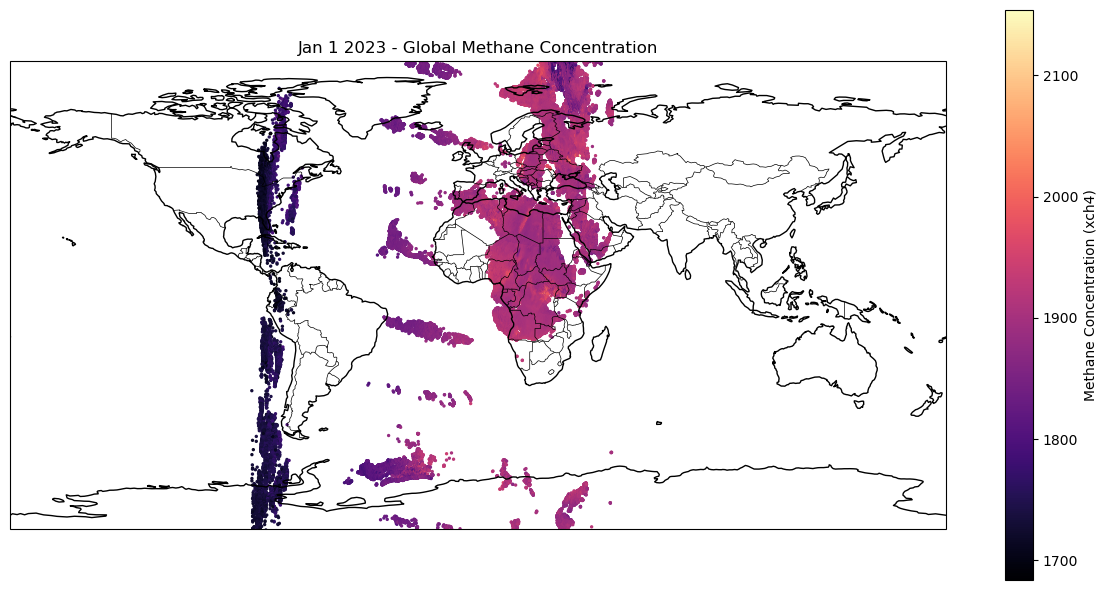

In [13]:
# Create figure
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Optional: add features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.set_global()

# Scatter plot
sc = ax.scatter(lat, lon, c=xch4, cmap='magma', s=2, transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(sc, pad=0.05)
cbar.set_label('Methane Concentration (xch4)')

plt.title('Jan 1 2023 - Global Methane Concentration')
plt.tight_layout()

# Note that this figure has incomplete coverage of the earth as TROPOMI does not get complete coverage of the earth in a single day
plt.show()